# Aula 13 - Representação de Informação e Conhecimento

Neste Jupyter iremos carregar diferentes arquivos em diferentes formatos e representar informação de diferentes maneiras.

A ideia é compreender como o computador armazenada dados, o que são codecs e encodings, o que é uma Estrutura de Dados, e como podemos utilizar esses conceitos para representar Informação e Conhecimento.

Usaremos a linguagem de programação Python para fazer isso.

Lembre-se que as variáveis em python são implícitas, não necessitando declarar o seu tipo:

*   String - `str`: Conjunto de caracteres, por exemplo: `[Nome]`
*   Inteiro - `int`: Valor inteiro (sem casas decimais), por exemplo: `[Dia do mês]`
*   Float - `float`: Valor com casas decimais, por exemplo : `[Altura de uma pessoa]`
*   Boleana - `bool`: Valor lógico (0 ou 1; False ou True), por exemplo: `[Peça presente ou ausente]`

Entretanto, na maioria das vezes usamos variáveis que são de tipos mais complexos (objetos/classes). É muito importante quando trabalhamos de maneira mais avançada com qualquer linguagem de programação saber o tipo de variável. Isso facilita o acesso a propriedades da variável (atributos do objeto) e a métodos implementados para aquelas classes.

## Exemplo 1 - Carregando um arquivo de texto

O comando **open** é usado para abrir arquivos. O **with** é usado para garantir finalização do arquivo depois de aberto de maneira segura. 

Quando um arquivo é aberto, ele pode ser aberto para leitura ('r'), escrita ('w'), acrescentar ('a') ou ler como binário ('rb').

Mais informações em https://docs.python.org/3/library/io.html

In [ ]:
with open('datasets/dados_topico1/texto_ansi.txt', 'r') as file:
    print(file)   # Printando o que foi carregado na variável file ao abrir o arquivo
    print(type(file)) # Printando o tipo de dado (estrutura) da variavel file
    linhas = file.readlines() # Readlines é um método da classe _io.TextIOWrapper que lê as linhas do arquivo

Perceba que o objto TextIOWrapper tem um atributo encoding que codifica os carateres do tipo cp1252 presentes na string de texto. Este encoding é referente ao alfabeto Latino em sistemas Windows (https://en.wikipedia.org/wiki/Windows-1252).

In [ ]:
print(linhas) 
print(type(linhas)) # As linhas são armazenadas em uma lista (vetor) de strings

In [ ]:
linhas[-1]

In [ ]:
for linha in linhas:  # printando as linhas
    print(linha)

Vamos supor que nosso código espere texto codificado em UTF-8.

Entretanto nosso arquivo de texto está codificado em ANSI (uma extensão do ASCII para arquivos do Windows).

Vejamos o que acontece:

In [ ]:
with open('datasets/dados_topico1/texto_ansi.txt', 'r', encoding="utf-8") as file:
    linhas = file.readlines()

In [ ]:
with open('datasets/dados_topico1/texto_ansi.txt', 'r', encoding="ansi") as file:
    linhas = file.readlines()
    
print(linhas)

Além disso podemos ver o arquivo em seu formato binário salvo:

In [ ]:
with open('datasets/dados_topico1/texto_ansi.txt', 'rb') as file:
    print(file)
    print(type(file))
    linhas = file.readlines()

In [ ]:
print(linhas)

Por padrão o Python 2 usa o ASCII para encoding. Já o Python 3, por padrão usa o Unicode (como o UTF-8). 

Os encodings nada mais são do que uma tabela que mapeia a representação gráfica do caracter na tela com uma sequência de bits (byte) que codifica aquele caracter específico.

Veja a imagem abaixo extraída de https://towardsdatascience.com/a-guide-to-unicode-utf-8-and-strings-in-python-757a232db95c

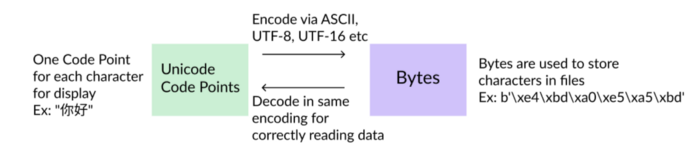

In [ ]:
for linha in linhas:
    print(linha)

Além disso, podemos forçar a decodificação dos carateres usando um encoding posteriormente ao carregamento do arquivo em formato binário, como feito abaixo:

In [ ]:
for linha in linhas:
    #print(linha.decode('utf-8'))
    print(linha.decode('ansi'))
     

In [ ]:
with open('datasets/dados_topico1/texto_utf8.txt', 'r', encoding="utf-8") as file:
    linhas = file.readlines()
    
print(linhas)

## Exemplo 2 - Entendendo Imagens

In [ ]:
with open('datasets/dados_topico1/lena.png', 'rb') as file:
    print(file)
    print(type(file))
    print(file.read())

Vamos usar bibliotecas que nos ajudam a ler as imagens da maneira correta.

Nas imagens a questão dos encodings recebe outro nome: **codecs**. Os codecs podem se referenciar tanto para imagem, quanto para áudio digital e vídeo. Em geral os codecs estão associados a extensão do arquivo (ex: .png, .jpg, .ogg, .mp3, .mp4, etc).

Os codecs não só codificam a imagem em bytes mas também servem para adicionar uma camada de inteligência a essa codificação, permitindo a compressão de dados (ver https://pt.wikipedia.org/wiki/Compress%C3%A3o_de_dados).

Vamos usar três bibliotecas:

In [ ]:
from IPython.display import display  # Para mostrar imagens no Jupyter inline
from PIL import Image                # Para carregar imagens no python

In [ ]:
imagem = Image.open('datasets/dados_topico1/lena.png') # Carregando imagem usando o PIL

In [ ]:
print(type(imagem)) # O objeto 'imagem' criado pela classe Image do PIL foi identificado como .png 
print(imagem) # Ao printar o objeto já vemos que a imagem tem 512x512 pixels é do tipo RBG
# Além disso, perceba que sabemos qual é a posição da memória RAM onde o objeto está instanciado

In [ ]:
imagem.show() # Esse comando é nativo do PIL e não abre a imagem inline no Jupyter

In [ ]:
display(imagem) # Agora printando a imagen inline usando o IPython

In [ ]:
width, height = imagem.size # O objeto imagem do PIL tem um atributo size em pixels
print(width, height)

In [ ]:
imagem.filename # O objeto também tem um atributo nome (caminho) do arquivo da imagem carregada

In [ ]:
imagem.format # Printa o formato da imagem

In [ ]:
imagem.mode

In [ ]:
imagem.getbands()

In [ ]:
imagem.getpixel((200,250)) # Pega o valor do pixel em uma posicao da imagem
#(0,0) é o canto superior esquerdo

In [ ]:
# Podemos converter para canal monocromatico
img_grey = imagem.convert("L")
print(img_grey)
img_grey

In [ ]:
img_grey.getpixel((200,250))

In [ ]:
raw_imagem = imagem.tobytes() # Pegando a imagem em bytes usando o método tobytes

In [ ]:
print(raw_imagem) 

O formato PNG adiciona uma série de informações que não permite identificarmos de maneira clara onde está cada pixel da matriz da imagem quando olhamos para o código binário.

Isso acontece pois o PNG adiciona um cabeçalho (header) com uma série de chunks (fragmentos de informação sequenciais) para representar a imagem. Para entendermos exatamente o que o código binário significa, precisariamos olhar a documentação do PNG (ver https://en.wikipedia.org/wiki/Portable_Network_Graphics).

Agora vamos usar o Numpy e o Matplotlib para ver a imagem como uma matriz

In [ ]:
import numpy as np  # Numpy é uma biblioteca para trabalhar com números

# Matplotlib trabalha com gráficos
import matplotlib.pyplot as plt

In [ ]:
im_array = np.array(imagem) # Carregando o objeto imagem (classe PIL Image) como um objeto numpy array

In [ ]:
im_array

In [ ]:
2**8

In [ ]:
len(im_array)

In [ ]:
im_array.size

In [ ]:
imgplot = plt.imshow(im_array)

## Exemplo 3 - Áudio

Vamos carregar um arquivo de áudio usando a biblioteca Librosa.

https://librosa.org/doc/latest/index.html

In [ ]:
import librosa                   # Processamento de áudio
import librosa.display           # Plot de gráficos
import matplotlib.pyplot as plt  # Plot de gráficos

import IPython  # Para tocar o áudio no Jupyter

In [ ]:
sinal, sr = librosa.load('datasets/dados_topico1/aeiou_ruido.wav', sr=44100) # Carregando

In [ ]:
type(sinal) # O librosa usa o numpy para guardar o sinal de áudio

In [ ]:
sinal # O sinal é um array numpy de uma dimensão onde cada valor é um float de 32 bits

In [ ]:
sinal[0] # Sinal é normalizado para ficar entre -1 a 1

In [ ]:
sinal[1]

In [ ]:
len(sinal)

In [ ]:
len(sinal)/44100

In [ ]:
max(sinal), min(sinal)

In [ ]:
len(sinal)/sr # Logo o tempo total do áudio é de 4.7 segundos aproximadamente

In [ ]:
librosa.display.waveshow(sinal, sr=sr,color='r')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)

In [ ]:
IPython.display.Audio('datasets/dados_topico1/aeiou_ruido.wav')

O arquivo de áudio tem suas particularidades assim como os arquivos de texto e imagens. Arquivos no formato WAV são os mais fáceis de entender pois não possuem compressão. Já mp3 e .opus (.ogg) possuem compressão cuja especificação precisa ser estudada.

Como já fizemos vários exemplos discutindo encoding e codecs, vamos discutir algo diferente neste exemplo.

Como podemos representar conhecimento em relação ao áudio? Uma opção interessante usada pelos Reconhecedores de Falas é a Extração de Features.  Features são atributos do áudio que podem ser usados para representá-lo, por exemplo, propriedades físicas da onda sonora.

Uma propriedade física bem comum no áudio é a frequência do som (o tom da corda do violão ou altura musical - não confundir com volume sonoro). Existe uma frequência característica de cada vogal em português.

Para ver isso, vamos plotar um gráfico diferente chamado de Espectrograma:

In [ ]:
import numpy as np

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(sinal)), ref=np.max)
librosa.display.specshow(D, y_axis='log',x_axis='time')

plt.colorbar(format='%+2.0f dB')
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Frequência (Hz)', fontsize=14)

Vamos tentar elinar o ruído do começo do áudio:

In [ ]:
0.55*44100

In [ ]:
sinal2 = sinal.copy()
for i in range(0,24255):
    sinal2[i] = 0

In [ ]:
type(sinal2)

In [ ]:
librosa.display.waveshow(sinal2, sr=sr,color='b')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)

In [ ]:
import soundfile as sf

In [ ]:
sf.write('datasets/dados_topico1/aeiou2.wav', sinal2, samplerate=44100, format='wav')

In [ ]:
IPython.display.Audio('datasets/dados_topico1/aeiou2.wav')

## Exemplo 4 - Grafos

Grafos são objetos matemáticos muito presentes em computação. Diversas estruturas de dados são construídas e representadas através de grafos. Vamos utilizar a biblioteca networkx (https://networkx.org/) que define uma classe para implementação de grafos como objetos.

Grafos são compostos por vértices **V** e arestas **E**, sendo denotado por G(V,E).

In [ ]:
import networkx as nx # Trabalhar com grafos

In [ ]:
grafo1 = nx.Graph() # Cria um objeto grafo

In [ ]:
print(type(grafo1))

In [ ]:
# Criando um grafo triangular (cluster)
grafo1.add_node(1)
grafo1.add_node(2)
grafo1.add_node(3)

grafo1.add_edge(1, 2)
grafo1.add_edge(2, 3)
grafo1.add_edge(3, 1)

In [ ]:
nx.draw(grafo1, with_labels = True)

#### Agora criando uma representação de árvore

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
G = nx.DiGraph()

# Nós
G.add_node("Raiz")
G.add_node("Filho 1")
G.add_node("Filho 2")
G.add_node("Neto 11")
G.add_node("Neto 12")
G.add_node("Neto 13")


G.add_edge("Raiz", "Filho 1")
G.add_edge("Raiz", "Filho 2")

G.add_edge("Filho 1", "Neto 11")
G.add_edge("Filho 1", "Neto 12")
G.add_edge("Filho 1", "Neto 13")

nx.draw(G, with_labels=True, arrows=False)

## Exemplo 5 - Dicionários

No Python um dicionário é uma estrutura de dados onde há um valor e uma chave (key). Ele permite indexação rápida e é bem útil para diversas situações.

Em memória, os dicionários podem ser **serializados** como arquivos JSON. O padrão JSON também pe onipresente em aplicações web. Várias APIs Rest usam ele como padrão de comunicação. 

No Python a serialização de objeto é feita por arquivos Pickle (como os objetos são guardadados em memória). Ver https://en.wikipedia.org/wiki/Serialization 

In [ ]:
meu_dicionario= {
    'chave1': 1234,       # Armazenando um inteiro
    'chave2': [1,2,3,4],  # Armazenando uma lista de inteiros
    'chave3': 'Oi mundo', # Armazenando uma string
    'chave4': 1.234,      # Armazenando um float
    '1': 'vamos ver se vai dar erro'
}

In [ ]:
meu_dicionario['1']

In [ ]:
meu_dicionario

In [ ]:
type(meu_dicionario) # Dicionário nativo do Python é objeto dict

In [ ]:
meu_dicionario['chave3'] # Acessando o valor armazenado na chave1

In [ ]:
type(meu_dicionario['chave1'])

In [ ]:
type(meu_dicionario['chave3'])

In [ ]:
meu_dicionario.keys() # Para saber quais são as chaves contidas no dicionario

In [ ]:
list(meu_dicionario.keys())[-1]

In [ ]:
type(meu_dicionario.keys())

In [ ]:
# Percorrendo todo o dicionario
for chave in meu_dicionario.keys():
    print(meu_dicionario[chave])

In [ ]:
meu_dicionario['nova_chave'] = 'oi mundo 2'

In [ ]:
meu_dicionario

In [ ]:
meu_dicionario.pop('chave1', None) # Removendo uma entrada do dicionário

In [ ]:
meu_dicionario

In [ ]:
zoologico = {
    'jaula1':{'animal':'macaco', 'quantidade':2, 'tamanho':10},
    'jaula2':{'animal':'girafa', 'quantidade':3, 'tamanho':50},
    'banheiro1':{}
}

Para salvar um dicionário mantendo a estrutura dele (não criar um arquivo de texto puro) podemos usar a biblioteca do JSON.

In [ ]:
import json

In [ ]:
with open('dict_data.json', 'w') as f:
    json.dump(meu_dicionario, f)

Vamos tentar abrir o arquivo agora

In [ ]:
with open('dict_data.json', 'r') as file:
    lines = file.readlines()

In [ ]:
type(lines), len(lines)

In [ ]:
lines[0]

In [ ]:
len(lines), type(lines[0]) # Carregou tudo como uma única grande string

In [ ]:
with open('dict_data.json', 'r') as file:
    lines = json.load(file)

In [ ]:
type(lines)

In [ ]:
lines

In [ ]:
len(lines), type(lines)

## Exemplo 6 - Tabelas

Normalmente tabelas estão em arquivos de texto do tipo .csv ou em arquivos Microsoft Excel .xlsx.

Podemos carregar a tabela na mão quando é um csv, bastando saber o separador usado. Mas para carregar xlsx e outros formatos de tabelas, vamos precisar de uma biblioteca.

A melhor biblioteca para se trabalhar com Tabelas em Python é o Pandas. Vejamos:

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('dados/gaf_esp.csv', sep=';') # Estamos carregando o arquivo csv usando o ; como separador

Os dados carregados no pandas estão em uma estrutura de dados chamada DataFrame. Este é o objeto que o pandas cria para representar os dados da tabela. Como todo objeto em POO (programação orientada à objeto), ele possui métodos que podem ser chamados. 

Para chamar um método de um objeto, basta escrever o nome da variável do objeto e colocar um . (ponto) na frente, evocando na sequência o nome do método seguido de  parenteses (arg), onde os argumentos arg podem ou não ser passados, dependendo do método.

Vejamos dois exemplos de head():

In [ ]:
dados.head() # o número passado para o método head é o número de linhas que queremos ver (por default 5)

No pandas podemos acessar as colunas através do nome, de forma parecida com um dicionário:

In [ ]:
dados['Espécie']

Vejamos quais são os tipos da estruturas de dados de uma **Tabela Pandas** e de uma **Coluna Pandas**:

In [ ]:
type(dados) # As tabelas dos pandas são objetos chamados de dataframes

In [ ]:
type(dados['Espécie']) # Já as colunas são objetos chamados de séries

Para transformar uma série em uma lista nativa do Python, podemos fazer:

In [ ]:
list(dados['Espécie'])

Agora vamos usar isso para contar quantos exemplos (entradas) temos de cada espécie:

In [ ]:
list(dados['Espécie']).count('Gafanhoto')

In [ ]:
list(dados['Espécie']).count('Esperança')

O método **.info()** do pandas nos diz quais são os tipos de dados que temos em cada coluna, a quantidade de linhas não nulas e quanto espaço na memória do computador (RAM) nosso dataframe está ocupando:

In [ ]:
dados.info()

O método **.describe()** do pandas nos gera estatísticas básicas de todas as colunas do dataframe:

In [ ]:
dados.describe()

Pandas e Dataframes são muito úteis para se fazer Ciência de Dados e Machine Learning. Iremos retormar esse exemplo nas próximas aulas quando aprendermos nossos primeiros algoritmos de ML.